# Data Acquisition

Importing necessary libraries

In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import twint
from datetime import date, timedelta
import nest_asyncio
nest_asyncio.apply()
import pandas as pd
import datetime
import os 
import calendar 
import datetime
import random
import matplotlib.pyplot as plt
from spellchecker import SpellChecker
from nltk.stem import WordNetLemmatizer
import re
from sklearn.feature_extraction import text
import warnings
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
import flair
from corextopic import corextopic as ct
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
warnings.filterwarnings('ignore')
pd.set_option("display.max_colwidth",-1)

### Scraping the tweets from Twitter using TWINT tool

We will scrape the tweets containing the word 'Asos' for the last 2 years (since 2019-10-30 until 2021-11-3). We decided scrape the tweets for each 6 months separately, as the tool has limitations in scraping the tweets.

In [2]:
try:
    os.remove("./AsosTweets.csv")
except IOError:
    pass
    
today = datetime.date.today()

c = twint.Config()
c.Search = 'Asos'   
c.Store_csv = True  
c.Lang="en"
c.Hide_output = True
c.Output = "AsosTweets.csv" 
c.Until = (today).strftime('%Y-%m-%d')
c.Since = (datetime.datetime(2021, 5, 3)).strftime('%Y-%m-%d')
twint.output.clean_lists()
twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [11]:
c = twint.Config()
c.Search = 'Asos'   
c.Store_csv = True  
c.Lang="en"
c.Hide_output = True
c.Output = "AsosTweets.csv" 
c.Until = (datetime.datetime(2021, 5, 2)).strftime('%Y-%m-%d')
c.Since = (datetime.datetime(2020, 11, 2)).strftime('%Y-%m-%d')
twint.output.clean_lists()
twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [14]:
c = twint.Config()
c.Search = 'Asos'   
c.Store_csv = True  
c.Lang="en"
c.Hide_output = True
c.Output = "AsosTweets.csv" 
c.Until = (datetime.datetime(2020, 11, 1)).strftime('%Y-%m-%d')
c.Since = (datetime.datetime(2020, 5, 1)).strftime('%Y-%m-%d')
twint.output.clean_lists()
twint.run.Search(c)

[!] No more data! Scraping will stop now.
found 0 deleted tweets in this search.


In [ ]:
c = twint.Config()
c.Search = 'Asos'   
c.Store_csv = True  
c.Lang="en"
c.Hide_output = True
c.Output = "AsosTweets.csv" 
c.Until = (datetime.datetime(2020, 4, 30)).strftime('%Y-%m-%d')
c.Since = (datetime.datetime(2019, 10, 30)).strftime('%Y-%m-%d')
twint.output.clean_lists()
twint.run.Search(c)

Reading the tweets from the AsosTweets.csv file.

In [2]:
tweets = pd.read_csv('AsosTweets.csv')
tweets.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1455685340493139971,1455685340493139971,2021-11-03 02:56:45 +03,2021-11-03,02:56:45,300,43524001,sometimeredhead,Sometimesredhead,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1455684206986596354,1455684206986596354,2021-11-03 02:52:14 +03,2021-11-03,02:52:14,300,1756116602,taliahutch,Talia,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1455683586112245763,1455683586112245763,2021-11-03 02:49:46 +03,2021-11-03,02:49:46,300,833156460687323136,vee_symone,Violet🥀,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1455682683225485314,1455682683225485314,2021-11-03 02:46:11 +03,2021-11-03,02:46:11,300,1018602561077698560,gremlinspice,clarice,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1455681563165814785,1455681563165814785,2021-11-03 02:41:44 +03,2021-11-03,02:41:44,300,1660726862,taraeconley,Tara,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


Check if there are any duplicated rows.

In [3]:
tweets.duplicated().value_counts()

False    750839
dtype: int64

Adding a new column to count the number of words in each tweet, and filter the dataframe in order to get the tweets with 50 words or above.

In [4]:
tweets['length'] = tweets.tweet.apply(lambda x: len(str(x).split(' ')))
tweets=tweets[tweets['length']>=50]

In [5]:
tweets.shape

(22676, 37)

There are 22676 tweets and 37 features. 

Sorting the dataframe by the date column from the most recent.

In [6]:
tweets.sort_values(by=['date'], inplace=True, ascending=False)

Filtering the dataframe to contain only necessary columns, which are date and tweet.

The date column represets the date in which the tweet was posted, and tweet column contains the tweet content.

In [7]:
tweets=tweets[['date','tweet']]

Checking for and removing duplicates in the new dataframe.

In [8]:
tweets=tweets.drop_duplicates()
tweets.duplicated().value_counts()

False    22499
dtype: int64

In [9]:
tweets=tweets.reset_index(drop=True)
tweets.head()

,date,tweet
0,2021-11-03,"@ASOS are seriously shit and going down hill. Theyve removed their customer service Twitter so they can fire more staff, theyve removed the blue light discount for emergency services and even though you pay for next day delivery for a year, it takes at least two days to arrive."
1,2021-11-03,@ASOS I have tried contacting through the app but no luck. I’m not pleased with a purchase. I bought a pair of heels from you last week and have worn them out once for 3 hours. The material has split across the back of both shoes and I’m not happy about the quality of them at all https://t.co/iED6vBvq2T
2,2021-11-03,"hey! selling Harry inspired Grammy look!! never worn, bought from ASOS and was too big/just didn’t fit me right and was going to return but missed their deadline. $60 obo plus shipping, feel free to message me or comment any question! PayPal goods and services :) #HarryStyles https://t.co/z9kMUvTnMP"
3,2021-11-02,"@ASOS_news @ASOS @ASOSMarketplace I already have done. Incorrect Item Sent - they said, there is nothing they can do &amp; I need to return it. However, the item is now sold out &amp; I’m unable to repurchase. Missing Packages - it’s Day 6 of waiting &amp; they told me, I need to wait until Day 7 for you to anything."
4,2021-11-02,@ASOS you need to sort your delivery service out .. shit show nearly all my orders NEVER arrive and now have to wait 10 days for a refund what a joke and oh a replacement was offered then told it was out of stock to find I can order the items on the app JOKE !!!


### Cleaning the tweets

Cleaning the tweets colums. Removing links, symbols, emojis, etc.

In [10]:
def clean_tweet(text):
    cleaned_text = []
    for tweet in text:
        cleaned_words = []
        for word in tweet.split(' '):
            word = re.sub('&amp;', '', word)
            word = re.sub('_', '', word)
            if(not word.startswith("http")):
                word=re.sub(r"-"," ",word)
                word=re.sub(r"/"," ",word)
            word=re.sub(r"(@[A-Za-z]+)|([^A-Za-z \t])|(\w+:\/\/\S+)","",word)
            word=word.lower()
            word = re.sub(r"\b(?:a*(?:ha+)+h?|(?:l+o+)+l+)\b", '', word)
            cleaned_words.append(word)
        cleaned_text.append(' '.join(cleaned_words))  
    return cleaned_text

In [11]:
tweets['cleaned_tweet']=clean_tweet(tweets['tweet'])

Correcting the misspelled words in tweets.

In [12]:
def spelling_check(tweets):
    x=1
    new_tweets=[]
    for tweet in tweets:
        print(str(x)+" - ", end="")
        x=x+1
        tweet=re.sub(r'(.)\1{2,}', r'\1', tweet)
        new_tweet=[]
        splitted_tweet = tweet.split()
        spell = SpellChecker()
        for word in splitted_tweet:
            new_tweet.append(spell.correction(word))
        new_tweets.append(' '.join(new_tweet))
    return new_tweets

In [ ]:
tweets['cleaned_tweet']=spelling_check(tweets['cleaned_tweet'])

Applying lemmatizer to the tweets to achieve the root forms of derived words.

In [14]:
def lemmatize_words(tweets, lemmatizer):
    cleaned_text=[]
    for tweet in tweets:
        cleaned_words=[]
        for word in tweet.split(' '):
            lem_word = lemmatizer.lemmatize(word)
            lem_word = re.sub(r"\b[a-zA-Z]\b", '', lem_word)
            cleaned_words.append(lem_word)
        cleaned_text.append(' '.join(cleaned_words))
    cleaned_text2 = []
    for post in cleaned_text:
        pattern = re.compile(r'\s+') 
        cleaned_text3 = re.sub(pattern, ' ', post).strip()
        cleaned_text2.append(''.join(cleaned_text3)) 
    return cleaned_text2

In [15]:
wordnet_lemmatizer = WordNetLemmatizer()
tweets['cleaned_tweet']=lemmatize_words(tweets['cleaned_tweet'],lemmatizer=wordnet_lemmatizer)

Data after cleaning

In [16]:
tweets.head()

,date,tweet,cleaned_tweet
0,2021-11-03,"@ASOS are seriously shit and going down hill. Theyve removed their customer service Twitter so they can fire more staff, theyve removed the blue light discount for emergency services and even though you pay for next day delivery for a year, it takes at least two days to arrive.",are seriously shit and going down hill theyve removed their customer service twitter so they can fire more staff theyve removed the blue light discount for emergency service and even though you pay for next day delivery for year it take at least two day to arrive
1,2021-11-03,@ASOS I have tried contacting through the app but no luck. I’m not pleased with a purchase. I bought a pair of heels from you last week and have worn them out once for 3 hours. The material has split across the back of both shoes and I’m not happy about the quality of them at all https://t.co/iED6vBvq2T,have tried contacting through the app but no luck im not pleased with purchase bought pair of heel from you last week and have worn them out once for hour the material ha split across the back of both shoe and im not happy about the quality of them at all
2,2021-11-03,"hey! selling Harry inspired Grammy look!! never worn, bought from ASOS and was too big/just didn’t fit me right and was going to return but missed their deadline. $60 obo plus shipping, feel free to message me or comment any question! PayPal goods and services :) #HarryStyles https://t.co/z9kMUvTnMP",hey selling harry inspired grammy look never worn bought from as and wa too big just didnt fit me right and wa going to return but missed their deadline obo plus shipping feel free to message me or comment any question paypal good and service hairstyle
3,2021-11-02,"@ASOS_news @ASOS @ASOSMarketplace I already have done. Incorrect Item Sent - they said, there is nothing they can do &amp; I need to return it. However, the item is now sold out &amp; I’m unable to repurchase. Missing Packages - it’s Day 6 of waiting &amp; they told me, I need to wait until Day 7 for you to anything.",already have done incorrect item sent they said there is nothing they can do need to return it however the item is now sold out im unable to repurchase missing package it day of waiting they told me need to wait until day for you to anything
4,2021-11-02,@ASOS you need to sort your delivery service out .. shit show nearly all my orders NEVER arrive and now have to wait 10 days for a refund what a joke and oh a replacement was offered then told it was out of stock to find I can order the items on the app JOKE !!!,you need to sort your delivery service out shit show nearly all my order never arrive and now have to wait day for refund what joke and oh replacement wa offered then told it wa out of stock to find can order the item on the app joke


Saving the cleaned dataframe in a csv file.

In [17]:
tweets.to_csv('AsosTweets_cleaned.csv', index=False)

### Vectorization

Reading the cleaned dataframe.

In [2]:
tweets = pd.read_csv('AsosTweets_cleaned.csv')

Defining the stop words to be filtered out before processing the tweets.

In [3]:
stop_words = text.ENGLISH_STOP_WORDS.union(['thats','youll','theyve','im','versus','got','woulve','took','just','year','said','saying','guys','guy',
                                            'id','bs','bc','ill','theyll','youve','isnt','thought','theyre','vry',
                                            'dont','ive','anymore','cuz','asos','order','yeah','yea','yesterday', 'did', 'didnt','havent', 'week', 'hi','wa','ha','day','today','really'])

Let's try feature extraction using both CountVectorizer and TfidfVectorizer.

**CountVectorizer**

In [4]:
coun_vect = CountVectorizer(stop_words=stop_words,ngram_range=(1,2),max_df=0.90,min_df = 3)
count_matrix = coun_vect.fit_transform(tweets['cleaned_tweet'])
count_array = count_matrix.toarray()
tweets_vec = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names())
tweets_vec

,ab,ab problem,ababa,abandon,abandon india,abandoned,abandoning,abba,abba joke,abc,...,zip broke,zip broken,zip nylon,zipper,zizi,zoe,zone,zoom,zoom fresh,zoom meeting
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Explore the 20 most common words.

In [5]:
tweets_vec.sum(0).sort_values(ascending=False)[:20]

item         3980
return       3584
time         3526
like         3522
delivery     3461
parcel       2888
refund       2858
help         2591
need         2498
sent         2496
email        2465
ordered      2396
want         2248
size         2081
received     2022
know         2014
say          1901
customer     1893
delivered    1748
money        1732
dtype: int64

**TfidfVectorizer**

In [6]:
tfidf_vect = TfidfVectorizer(stop_words=stop_words,ngram_range=(1,2),max_df=0.90,min_df = 3)
tfidf_matrix = tfidf_vect.fit_transform(tweets['cleaned_tweet'])
tfidf_array = tfidf_matrix.toarray()
tweets_tfidf = pd.DataFrame(data=tfidf_array,columns = tfidf_vect.get_feature_names())
tweets_tfidf

,ab,ab problem,ababa,abandon,abandon india,abandoned,abandoning,abba,abba joke,abc,...,zip broke,zip broken,zip nylon,zipper,zizi,zoe,zone,zoom,zoom fresh,zoom meeting
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22494,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Topic Modeling

Using feature extracted from Count Vectorizer and TF-IDF Vectorizer, we will try and compare different topic modeling algorithms LSA, LDA, Corex and NMF to extract topics for a set of processed tweets.

In [7]:
# function for displaying the words in each topic to be used for all models.
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
# https://github.com/hiranya33/Metis-Fletcher/blob/master/FletcherLDA-sklearn.ipynb

**LSA model using features extracted from TF-IDF Vectorizer**

Lets see how the model performs with 2 to 8 topics.

In [8]:
lsa_model_2 = TruncatedSVD(2)
lsa_cv_doc_topic = lsa_model_2.fit_transform(tfidf_matrix)

In [9]:
display_topics(lsa_model_2, tfidf_vect.get_feature_names(), 20) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service, delivered, want, say, size, money

Topic  1
like, size, clothes, buy, new, voucher, gift, love, look, people, dress, work, fit, gift voucher, make, deserve, brand, good, think, shop


In [10]:
lsa_model_3 = TruncatedSVD(3)
lsa_cv_doc_topic = lsa_model_3.fit_transform(tfidf_matrix)

In [11]:
display_topics(lsa_model_3, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, gift, love, look, people, work, fit, gift voucher, dress, make

Topic  2
return, item, size, label, code, return item, sent, refund, returned, return label, send, bag, post office, post, office


In [12]:
lsa_model_4 = TruncatedSVD(4)
lsa_cv_doc_topic = lsa_model_4.fit_transform(tfidf_matrix)

In [13]:
display_topics(lsa_model_4, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, gift, love, look, people, work, dress, fit, gift voucher, make

Topic  2
return, item, label, size, code, return item, sent, refund, returned, return label, send, bag, post office, post, office

Topic  3
video, help, youtube, thanks, subscribe, link, work, small youtube, video link, hey, work help, help share, youtube hope, hope subscribe, subscribe thanks


In [14]:
lsa_model_5 = TruncatedSVD(5)
lsa_cv_doc_topic = lsa_model_5.fit_transform(tfidf_matrix)

In [15]:
display_topics(lsa_model_5, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, love, gift, look, people, work, dress, fit, gift voucher, make

Topic  2
return, item, label, size, code, return item, sent, refund, returned, return label, bag, send, post office, post, office

Topic  3
video, help, youtube, thanks, subscribe, link, work, small youtube, video link, work help, hope subscribe, youtube hope, notice reach, subscribe thanks, help share

Topic  4
voucher, gift, customer, gift voucher, refund, service, deserve, customer service, deserve gift, email, money, chat, bank, treat, month


In [16]:
lsa_model_6 = TruncatedSVD(6)
lsa_cv_doc_topic = lsa_model_6.fit_transform(tfidf_matrix)

In [17]:
display_topics(lsa_model_6, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, love, gift, look, people, dress, work, fit, gift voucher, make

Topic  2
return, item, label, size, code, return item, sent, refund, returned, return label, send, bag, post office, post, office

Topic  3
video, help, youtube, thanks, subscribe, link, work, small youtube, video link, work help, help share, subscribe thanks, notice reach, youtube hope, hope subscribe

Topic  4
gift, voucher, gift voucher, customer, refund, deserve, service, deserve gift, customer service, money, email, chat, bank, treat, asostreatme

Topic  5
return, parcel, label, delivery, voucher, code, gift, hermes, delivered, gift voucher, need, deserve, new, post, return label


In [18]:
lsa_model_7 = TruncatedSVD(7)
lsa_cv_doc_topic = lsa_model_7.fit_transform(tfidf_matrix)

In [19]:
display_topics(lsa_model_7, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, gift, love, look, people, work, dress, fit, gift voucher, make

Topic  2
return, item, label, size, code, return item, sent, refund, returned, return label, send, bag, post office, post, office

Topic  3
video, help, youtube, thanks, subscribe, link, work, hey, small youtube, video link, work help, youtube hope, subscribe thanks, hope subscribe, notice reach

Topic  4
gift, voucher, gift voucher, customer, refund, deserve, service, deserve gift, customer service, email, money, chat, bank, treat, asostreatme

Topic  5
return, parcel, code, label, voucher, delivery, gift, delivered, need, hermes, new, gift voucher, post, office, post office

Topic  6
item, gift, voucher, gift voucher, deserve, ordered, deserve gift, received, delivery, size, sent, refund, returned, transferred, voucher transferred


In [20]:
lsa_model_8 = TruncatedSVD(8)
lsa_cv_doc_topic = lsa_model_8.fit_transform(tfidf_matrix)

In [21]:
display_topics(lsa_model_8, tfidf_vect.get_feature_names(), 15) 


Topic  0
item, return, delivery, refund, parcel, sent, time, email, ordered, received, help, like, customer, need, service

Topic  1
size, like, clothes, buy, new, voucher, love, gift, look, people, dress, work, fit, gift voucher, make

Topic  2
return, item, label, size, code, return item, sent, refund, returned, return label, send, bag, post office, post, office

Topic  3
video, help, youtube, thanks, subscribe, link, work, small youtube, video link, hey, work help, youtube hope, hope subscribe, notice reach, subscribe thanks

Topic  4
gift, voucher, gift voucher, deserve, customer, deserve gift, refund, service, customer service, money, email, bank, treat, chat, asostreatme

Topic  5
return, parcel, code, label, delivery, hermes, delivered, need, post, office, post office, voucher, new, return label, gift

Topic  6
item, gift, voucher, gift voucher, ordered, deserve, deserve gift, delivery, received, sent, size, asostreatme, transferred, voucher transferred, returned

Topic  7
deli

Since the LSA model did not perform well, let's see LDA, CorEx and NMF models.

**LDA model using features extracted from Count Vectorizer**

Since LDA has a bulit in TD-IDF we will use CountVectorizer as the vectorizer. We will try the model on 2 to 6 number of topics in order to get the best results.

In [22]:
lda_2 = LatentDirichletAllocation(2)
lda_doc_topic = lda_2.fit_transform(count_matrix)

In [23]:
display_topics(lda_2, tfidf_vect.get_feature_names(), 15)


Topic  0
item, return, delivery, parcel, refund, sent, email, ordered, time, received, help, customer, delivered, service, say

Topic  1
like, size, time, work, new, people, buy, need, clothes, look, know, love, make, want, think


In [24]:
lda_3 = LatentDirichletAllocation(3)
lda_doc_topic = lda_3.fit_transform(count_matrix)

In [25]:
display_topics(lda_3, tfidf_vect.get_feature_names(), 15)


Topic  0
delivery, parcel, sent, ordered, item, email, received, help, return, time, delivered, refund, say, package, told

Topic  1
like, size, new, clothes, love, buy, need, dress, look, time, return, voucher, make, fit, want

Topic  2
item, refund, customer, return, like, pay, want, time, send, money, service, work, code, people, delivery


In [26]:
lda_4 = LatentDirichletAllocation(4)
lda_doc_topic = lda_4.fit_transform(count_matrix)

In [27]:
display_topics(lda_4, tfidf_vect.get_feature_names(), 15)


Topic  0
like, size, look, fit, think, time, want, brand, jean, know, clothes, buy, going, pair, fashion

Topic  1
item, ordered, time, dress, want, code, wrong, stock, card, use, pay, discount, like, send, gift

Topic  2
return, delivery, item, parcel, refund, email, sent, help, received, delivered, time, ordered, customer, service, told

Topic  3
work, people, new, like, need, good, voucher, buy, clothes, time, love, make, gift, know, job


In [28]:
lda_5 = LatentDirichletAllocation(5)
lda_doc_topic = lda_5.fit_transform(count_matrix)

In [29]:
display_topics(lda_5, tfidf_vect.get_feature_names(), 15)


Topic  0
parcel, time, delivered, work, like, delivery, people, home, know, going, hermes, left, say, deliver, thing

Topic  1
delivery, premier, time, ordered, say, paid, help, think, placed, premier delivery, like, pay, paying, add, want

Topic  2
return, gift, voucher, help, need, code, shop, online, gift voucher, label, post, able, deserve, office, chat

Topic  3
size, like, dress, clothes, buy, new, look, pair, fit, bought, brand, good, want, shoe, wear

Topic  4
item, refund, sent, email, received, customer, ordered, time, service, return, parcel, help, told, money, returned


In [30]:
lda_6 = LatentDirichletAllocation(6)
lda_doc_topic = lda_6.fit_transform(count_matrix)

In [31]:
display_topics(lda_6, tfidf_vect.get_feature_names(), 15)


Topic  0
voucher, love, new, gift, work, want, gift voucher, need, buy, treat, deserve, going, job, like, clothes

Topic  1
like, size, look, think, people, brand, clothes, make, buy, shop, know, time, good, online, thing

Topic  2
parcel, delivery, email, refund, received, delivered, sent, help, ordered, hermes, say, time, address, told, money

Topic  3
return, item, sent, code, refund, delivery, send, want, time, ordered, account, paid, help, pay, label

Topic  4
pair, ordered, delivery, size, parcel, like, time, jean, home, use, know, going, come, work, look

Topic  5
customer, service, customer service, time, chat, help, need, refund, company, money, team, make, contact, care, work


Since the LDA model did not perform well, we can see that some topics are mixed with each other, let's see CorEx and NMF models.

**CorEx model using features extracted from Count Vectorizer and TF-IDF Vectorizer**

In [32]:
# function for displaying the words in each topic to be used for CorEx model.
def corex_topics(topic_model):
    topics = topic_model.get_topics()
    return topics
    for n,topic in enumerate(topics):
        topic_words,_ = zip(*topic)
        print('Topic {} keywords: '.format(n) + ', '.join(topic_words))

In [33]:
#count vectorizer
words = list(np.asarray(coun_vect.get_feature_names()))
topic_model = ct.Corex(n_hidden=5, 
                       words=words,
                       max_iter=100, 
                       seed=42)

topic_model.fit(count_matrix, words=words, docs=tweets['cleaned_tweet'])

#tf idf
words = list(np.asarray(tfidf_vect.get_feature_names()))
topic_model_2 = ct.Corex(n_hidden=5, 
                       words=words,
                       max_iter=100, 
                       seed=42)
topic_model_2.fit(tfidf_matrix, words=words, docs=tweets['cleaned_tweet'])

CorEx topic modeling with count vectorizer

In [34]:
topics = corex_topics(topic_model)
topic_num=0
for topic in topics:
    print("topic ",topic_num, ":")
    for word in topic:
        print(word[0], end=", ")
    print(" ")
    print(" ")
    topic_num=topic_num+1

topic  0 :
refund, sent, received, email, item, return, ordered, service, customer service, customer,  
 
topic  1 :
voucher, gift, gift voucher, deserve gift, deserve, gift card, asostreatme, voucher transferred, transferred bank, subscribe,  
 
topic  2 :
parcel, delivery, delivered, hermes, deliver, address, courier, door, driver, tracking,  
 
topic  3 :
size, clothes, fit, pair, wear, love, dress, jean, like, look,  
 
topic  4 :
online, fandom, amazon, store, high street, high, fee, uk, fansub, street,  
 


CorEx topic modeling with TF-IDF vectorizer

In [35]:
topics = corex_topics(topic_model_2)
topic_num=0
for topic in topics:
    print("topic ",topic_num, ":")
    for word in topic:
        print(word[0], end=", ")
    print(" ")
    print(" ")
    topic_num=topic_num+1

topic  0 :
refund, parcel, delivery, return, email, item, received, sent, delivered, hermes,  
 
topic  1 :
youtube, video, subscribe, youtube channel, small youtube, help share, notice reach, youtube hope, subscribe thanks, hope subscribe,  
 
topic  2 :
sorry read, download app, kind regard, download, app type, representative download, line kind, support line, speak representative, type live,  
 
topic  3 :
voucher transferred, transferred bank, transferred, asosvibeme, asosvibeme deserve, deserve gift, voucher, deserve, gift voucher, bank,  
 
topic  4 :
notice missing, australia seen, virus gave, life australia, friend life, missing sister, beautiful little, wont notice, girl literally, sister best,  
 


The model did not produce sensible topics, let's see how NMF model performs.

**NMF model using features extracted from TF-IDF Vectorizer**

Lets see how the NMF model performs with 2 to 8 topics.

In [36]:
nmf_model_2 = NMF(2)
nmf_doc_topic_2 = nmf_model_2.fit_transform(tfidf_matrix)

In [37]:
display_topics(nmf_model_2, tfidf_vect.get_feature_names(), 15)


Topic  0
item, return, delivery, refund, parcel, sent, email, received, ordered, delivered, service, customer, help, told, time

Topic  1
like, size, clothes, new, buy, look, dress, people, work, time, love, gift, voucher, make, know


In [38]:
nmf_model_3 = NMF(3)
nmf_doc_topic_3 = nmf_model_3.fit_transform(tfidf_matrix)

In [39]:
display_topics(nmf_model_3, tfidf_vect.get_feature_names(), 15)


Topic  0
delivery, parcel, delivered, hermes, say, ordered, paid, time, address, deliver, email, premier, service, told, arrive

Topic  1
like, size, clothes, new, buy, look, dress, time, people, work, gift, love, voucher, make, know

Topic  2
return, item, refund, sent, email, received, returned, customer, service, help, customer service, send, code, ordered, label


In [40]:
nmf_model_4 = NMF(4)
nmf_doc_topic_4 = nmf_model_4.fit_transform(tfidf_matrix)

In [41]:
display_topics(nmf_model_4, tfidf_vect.get_feature_names(), 15)


Topic  0
delivery, parcel, delivered, hermes, say, ordered, paid, time, address, deliver, email, premier, service, told, arrive

Topic  1
like, size, clothes, new, buy, look, dress, time, gift, people, love, voucher, know, need, want

Topic  2
return, item, refund, sent, email, received, returned, customer, service, customer service, help, send, code, label, ordered

Topic  3
video, youtube, thanks, subscribe, link, help, small youtube, video link, hey, notice reach, subscribe thanks, hope subscribe, youtube hope, help share, link small


In [42]:
nmf_model_5 = NMF(5)
nmf_doc_topic_5 = nmf_model_5.fit_transform(tfidf_matrix)

In [43]:
display_topics(nmf_model_5, tfidf_vect.get_feature_names(), 15)


Topic  0
delivery, parcel, delivered, hermes, say, ordered, paid, time, address, deliver, email, service, premier, told, arrive

Topic  1
size, like, dress, look, people, know, fit, time, buy, think, clothes, good, brand, pair, thing

Topic  2
return, item, refund, sent, email, received, returned, customer, service, help, customer service, send, code, label, return item

Topic  3
video, youtube, thanks, subscribe, link, help, small youtube, video link, hey, subscribe thanks, youtube hope, notice reach, hope subscribe, help share, work help

Topic  4
gift, voucher, gift voucher, deserve, deserve gift, new, treat, asostreatme, love, bank, clothes, voucher transferred, transferred, transferred bank, asosvibeme


In [44]:
nmf_model_6 = NMF(6)
nmf_doc_topic_6 = nmf_model_6.fit_transform(tfidf_matrix)

In [45]:
display_topics(nmf_model_6, tfidf_vect.get_feature_names(), 15)


Topic  0
refund, item, email, sent, customer, received, service, customer service, returned, chat, told, money, contact, help, reply

Topic  1
size, like, dress, look, people, know, fit, time, buy, clothes, think, good, brand, pair, thing

Topic  2
return, item, label, code, return item, return label, post, post office, office, need, bag, print, create, created, send

Topic  3
video, youtube, thanks, subscribe, link, help, small youtube, video link, hey, subscribe thanks, youtube hope, notice reach, hope subscribe, help share, link small

Topic  4
gift, voucher, gift voucher, deserve, deserve gift, new, treat, asostreatme, love, clothes, bank, voucher transferred, transferred, transferred bank, asosvibeme

Topic  5
delivery, parcel, delivered, hermes, say, ordered, paid, deliver, time, address, premier, left, arrive, door, premier delivery


In [46]:
nmf_model_7 = NMF(7)
nmf_doc_topic_7 = nmf_model_7.fit_transform(tfidf_matrix)

In [47]:
display_topics(nmf_model_7, tfidf_vect.get_feature_names(), 15)


Topic  0
customer, service, customer service, chat, help, email, contact, live, live chat, team, told, time, reply, care, account

Topic  1
size, like, dress, look, people, know, fit, clothes, buy, time, think, good, brand, pair, thing

Topic  2
return, label, code, return item, return label, post, post office, need, office, bag, print, create, help, created, item

Topic  3
video, youtube, thanks, subscribe, link, small youtube, help, video link, notice reach, hope subscribe, youtube hope, subscribe thanks, hey, help share, link small

Topic  4
gift, voucher, gift voucher, deserve, deserve gift, new, treat, asostreatme, love, bank, clothes, voucher transferred, transferred, transferred bank, asosvibeme

Topic  5
delivery, parcel, delivered, hermes, say, paid, ordered, deliver, time, address, premier, left, arrive, door, premier delivery

Topic  6
item, refund, sent, received, returned, email, ordered, wrong, ago, refunded, money, returned item, receive, missing, stock


In [48]:
nmf_model_8 = NMF(8)
nmf_doc_topic_8 = nmf_model_8.fit_transform(tfidf_matrix)

In [49]:
display_topics(nmf_model_8, tfidf_vect.get_feature_names(), 15)


Topic  0
customer, service, email, customer service, refund, chat, help, contact, told, reply, money, sent, time, received, account

Topic  1
size, like, look, dress, people, know, fit, clothes, buy, think, time, good, brand, pair, thing

Topic  2
return, label, code, return item, return label, post, post office, need, office, print, bag, create, created, need return, send

Topic  3
video, youtube, thanks, subscribe, link, small youtube, video link, subscribe thanks, notice reach, youtube hope, hope subscribe, help share, link small, work help, hey

Topic  4
gift, voucher, gift voucher, deserve, deserve gift, new, treat, asostreatme, love, clothes, bank, voucher transferred, transferred, transferred bank, asosvibeme

Topic  5
parcel, delivered, hermes, say, left, parcel delivered, door, address, home, deliver, driver, house, courier, received, safe

Topic  6
item, refund, sent, ordered, received, returned, wrong, stock, refunded, returned item, missing, wrong item, ordered item, refun

After observing the results with different number of topics, we can see that NMF model with 6 topics produced the best results.

### Categorize tweets by topic

Categorize tweets by most probable topic.

In [50]:
topics_by_tweet = pd.DataFrame(nmf_doc_topic_6, columns = ['Customer Service', 'Products','Return Service','Video Content','Rewards','Delivery Service'])
topics_by_tweet['main_topic'] = topics_by_tweet.idxmax(axis=1)
topics_by_tweet['cleaned_tweet'] = tweets['cleaned_tweet']
topics_by_tweet['tweet'] = tweets['tweet']

In [51]:
topics_by_tweet.sample(10)

,Customer Service,Products,Return Service,Video Content,Rewards,Delivery Service,main_topic,cleaned_tweet,tweet
1631,0.016142,0.002705,0.000200,0.005913,0.000756,0.002112,Customer Service,hi sophie scroll past the far topic section click on contact now tap on chat now select the topic and subatomic of your query and tap on fill in my detail manually to then open the chat they might be busy so were sorry for the wait but theyre there to help,"@BeastieSophie Hi Sophie! Scroll past the 'FAQ topics' section, click on 'contact us now' &amp; tap on 'chat now'. Select the topic and subtopic of your query, and tap on 'fill in my details manually' to then open the chat. They might be busy, so we're sorry for the wait, but they're there to help"
7514,0.000000,0.005666,0.000000,0.000000,0.027375,0.003695,Rewards,would love an aroma because ive been put in tier regardless of following all lockdown rule cant see my boyfriend on xmas my stepdad left so it legit just me my mum and two brother for xmas and im just so stressed and depressed so this would be amazing,"@ASOS I would love an @ASOS #ASOSMAS because I’ve been put in tier 4 regardless of following all lockdown rules,I can’t see my boyfriend on Xmas 🥺😓💔 my stepdad left so it’s legit just me my mum and two brothers for Xmas and I’m just so stressed and depressed so this would be amazing"
16922,0.002959,0.026925,0.000000,0.013899,0.021898,0.001855,Products,have worked at pretty little thing as since my partner health worsened so no longer work in public sector or civil service job just agency work enabling me to drop work at any time so worked in warehousing to understand the love hate that people had for these job,I have worked at Pretty Little Thing &amp; ASOS since my partners health worsened so no longer work in Public Sector or Civil Service jobs just agency work enabling me to drop work at any time so worked in warehousing to understand the love/hate that people had for these jobs.
786,0.000000,0.020834,0.005555,0.000000,0.005240,0.001956,Products,friend in nigeria said when he buy thing from as the rate he is charged is same what abokifx post so according to muffy and bhai fan abokifx also force as to sell at abokifx rate see at this point tell you this govt ha damaged the brain of nigerian,"A friend in Nigeria said when he buys things from ASOS, the rate he is charged is same as what AbokiFX posts. So according to Meffy and Buhari fans, AbokiFX also forces ASOS to sell at AbokiFX rates. See at this point, I tell you: This govt has damaged the brain of nigerians."
21764,0.002628,0.010329,0.001879,0.000000,0.001313,0.015560,Delivery Service,they are the absolute worst stopped buying from company that use them too they left package of mine sitting in front garden in cardboard box when it wa chucking with rain another time in my safe space which do not have turned out theyd put in recycling bin,@CarolineHirons @Hermesparcels @ASOS @nextofficial @thehutgroup They are the absolute worst!! I stopped buying from companies that use them too. They left a package of mine sitting in front garden in a cardboard box when it was chucking with rain! &amp; another time in my safe space - which I do not have!! Turned out they’d put in recycling bin
22374,0.012843,0.003930,0.036106,0.000000,0.002132,0.000000,Return Service,got an email with flash off code checked to see if you had the do marten wanted you saved them ready for am and now the code is valid they have disappeared the code state off everything so if you have removed certain item then thats bit unfair,"@ASOS Got an email with a flash 20% off code, Checked to see if you had the dr martens I wanted - you do💃🏼Saved them ready for 7pm and now the code is valid they have disappeared! The code states 20% off everything! So if you have removed certain items then that’s a bit unfair!"
14571,0.027196,0.004767,0.000000,0.004704,0.000000,0.027832,Delivery Service,ordered few thing june and just checked and it said they couldnt delivery that it bei

Assigning the topics to the tweets in the original dataframe.

In [52]:
tweets['topic'] = topics_by_tweet['main_topic']

In [53]:
tweets.sample(5)

,date,tweet,cleaned_tweet,topic
18273,2020-03-19,"@ASOS My friend, @shanzsocannon, was supposed to have her wedding in April, but was forced to postpone it due to what's been happening. Perhaps a little treat from you guys would be great. She's currently based in the UK too, so this wouldn't be so much of an issue with shipping. 🙂",my friend wa supposed to have her wedding in april but wa forced to postpone it due to whats been happening perhaps little treat from you guy would be great shes currently based in the uk too so this wouldnt be so much of an issue with shipping,Rewards
6256,2021-02-02,"So topshop have been bought out by ASOS. They will close all their shops, the first of high street to go due to Covid. Funny it’s been bought by an online shop. Sure people were classed as conspiracy theorists when they said it was want the plan was. The great reset.",so teashop have been bought out by as they will close all their shop the first of high street to go due to couid funny it been bought by an online shop sure people were classed conspiracy theorist when they said it wa want the plan wa the great reset,Products
5767,2021-02-14,"Me, next day: Still no parcel. Can I have a refund? ASOS: we’ll ask the courier. So now you have to wait 48 hours for their response. Me, 48 hours later: 🤷🏻‍♀️? ASOS: ok, we’ll request a refund. It’ll take 48 hours for our request to be processed.",me next day still no parcel can have refund as well ask the courier so now you have to wait hour for their response me hour later as ok well request refund itll take hour for our request to be processed,Customer Service
1841,2021-07-27,"@ASOS HI placed an order yesterday for a few items. I have the next day delivery, however, in the confirmation I got, it says it’ll be delivered by Friday! This isn’t the first time this has happened. I payed extra for premium delivery - surely I should be getting that ALL year!",hi placed an order yesterday for few item have the next day delivery however in the confirmation got it say itll be delivered by friday this isnt the first time this ha happened payed extra for premium delivery surely should be getting that all year,Delivery Service
2962,2021-06-04,"@ASOS I contacted the shipping company(APG) and I have been informed that my order has been returned to ASOS because the delay of paying the duties. When will I get the refund? Order number: 619176194 please reply to my tweet,in DM",contacted the shipping companyapg and have been informed that my order ha been returned to as because the delay of paying the duty when will get the refund order number please reply to my tweeting do,Customer Service


Drawing a WordCloud for each topic.

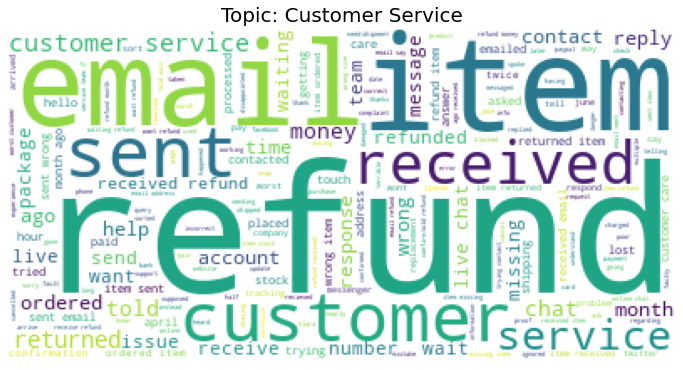

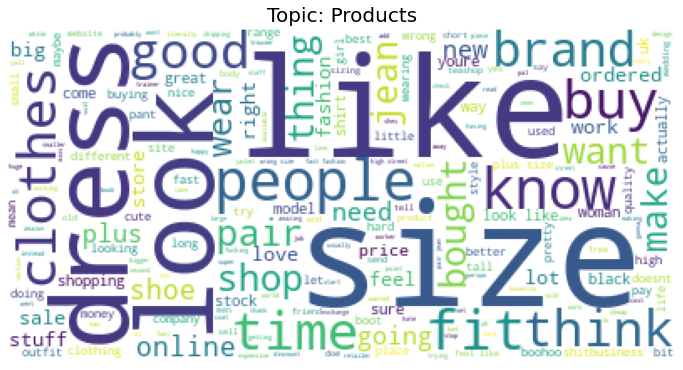

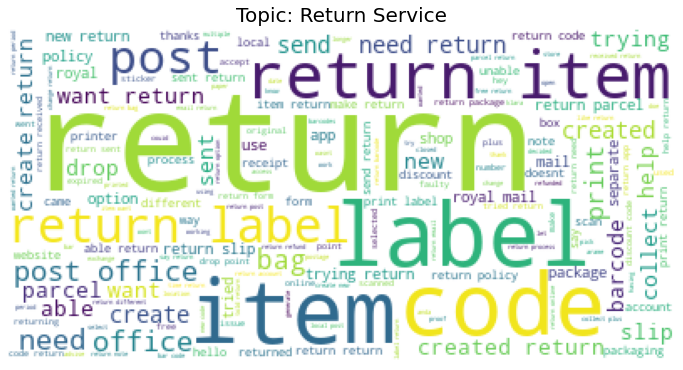

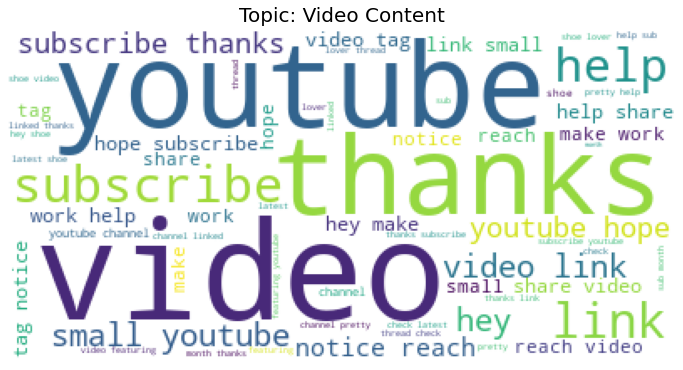

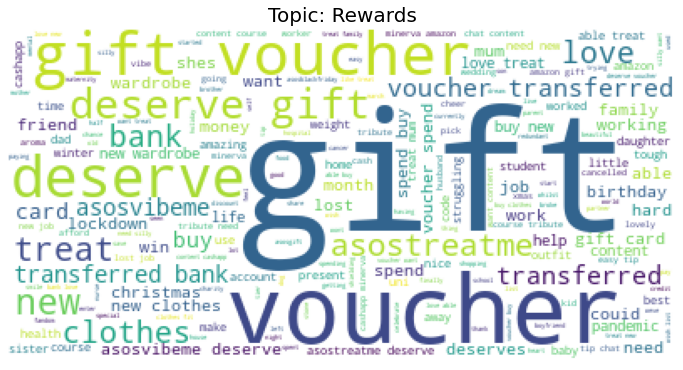

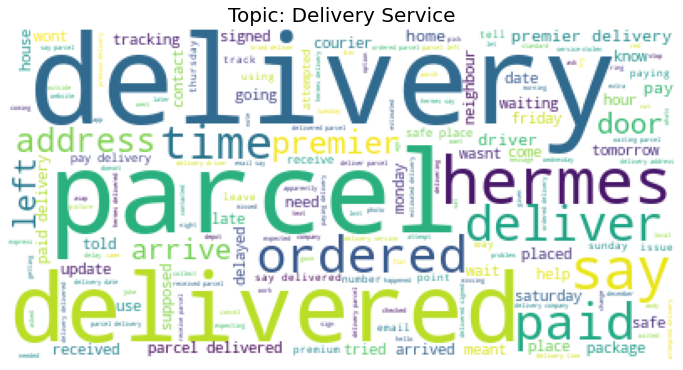

In [54]:
def get_word_freq(topic, model, n_top_words, vocab):
 
    word_dict = {};
    freq = sorted(model.components_[topic])[:-n_top_words - 1: -1]
    words_ids = model.components_[topic].argsort()[:-n_top_words - 1:-1]
    words = [vocab[key] for key in words_ids]
    for i in range(n_top_words):
        word_dict[words[i]] = freq[i]

    
    return word_dict

vocab=tfidf_vect.get_feature_names()

list_of_topics= ['Customer Service', 'Products','Return Service','Video Content','Rewards','Delivery Service']
for topic in range(6):
    plt.figure(figsize = (12,14))
    plt.imshow(WordCloud(background_color='white').fit_words(dict(get_word_freq(topic, nmf_model_6, 200, vocab))))
    plt.axis('off')
    plt.title('Topic: ' + list_of_topics[topic], size=20)
    plt.show();
# https://github.com/hiranya33/Metis-Fletcher/blob/master/FletcherLDA-sklearn.ipynb

### Sentiment Analysis

Applying Sentiment Analysis using Flair algorithm to identify and classify the subjective information in tweets content. The information can be an opinion, a judgment or feeling about Asos services and products.

In [ ]:
flair_sentiment = flair.models.TextClassifier.load('sentiment-fast');

In [56]:
def classify(tweet):
    s = flair.data.Sentence(tweet)
    flair_sentiment.predict(s)
    y=str(s.labels[0]).split()
    label= y[0]
    score = y[1]
    score= float(re.sub('[()]', '', score))
    if score < 0.7:
        label="NEUTRAL"
 
    return label

In [57]:
tweets['sentiment']=tweets['cleaned_tweet'].apply(lambda x:classify(x))

Creating a separate dataframe for each sentiment category.

In [58]:
tweets_pos=tweets[tweets['sentiment']=='POSITIVE']
tweets_neg=tweets[tweets['sentiment']=='NEGATIVE']
tweets_neu=tweets[tweets['sentiment']=='NEUTRAL']

In [59]:
print('Number of positive tweets is {}'.format(tweets_pos.shape[0]))
print('Number of negative tweets is {}'.format(tweets_neg.shape[0]))
print('Number of neutral tweets is {}'.format(tweets_neu.shape[0]))

print("Percentage")
total_rows= tweets.shape[0]
print("Positive: ", round(tweets_pos.shape[0]/total_rows,3)*100,"%")
print("Negative: ",  round(tweets_neg.shape[0]/total_rows,3)*100,"%")
print("Neutral: ",  round(tweets_neu.shape[0]/total_rows,3)*100,"%")

Number of positive tweets is 3663
Number of negative tweets is 16798
Number of neutral tweets is 2038
Percentage
Positive:  16.3 %
Negative:  74.7 %
Neutral:  9.1 %


In [60]:
tweets.sample(10)

,date,tweet,cleaned_tweet,topic,sentiment
457,2021-10-08,"@ASOS hi, I have processed and sent a return of several items. I selected all items to be returned (worth £85) and have not received the full amount (£35 refunded) I cannot access the live chat, I login and it says my account isn’t available. Please may I have some assistance https://t.co/8bcBzE3OOl",hi have processed and sent return of several item selected all item to be returned worth and have not received the full amount refunded cannot access the live chat login and it say my account isnt available please may have some assistance,Return Service,NEGATIVE
21738,2019-11-27,"@Cat_Davies @leedsucu Cat, I similarly feel torn about many points that you raise. There is a teach-out session on Monday at 3 pm in which we will discuss ASOS, what it means for researchers and their projects. Please join as we will brainstorm ideas on how to protect research yet support strike/ASOS.",cat similarly feel torn about many point that you raise there is teach out session on monday at am in which we will discus as what it mean for researcher and their project please join we will brainstorm idea on how to protect research yet support strike as,Products,NEGATIVE
11994,2020-08-03,"@ASOS_HeretoHelp I ordered from you and paid nearly £6 for next day delivery. I am still yet to receive my order, and someone told me on messenger i need to wait another 4 working days for my order to come. I understand you’re busy but i paid extra for next day delivery",ordered from you and paid nearly for next day delivery am still yet to receive my order and someone told me on messenger need to wait another working day for my order to come understand youre busy but paid extra for next day delivery,Delivery Service,NEGATIVE
18570,2020-03-10,@ASOS_HeretoHelp @DPDgroup_news Still no updates on my order and no time slot given either 🤷🏼‍♀️ I know delivery times can be up to 10pm but it’s a bit ridiculous at this point when I’ve paid extra for next day delivery and haven’t received any updates at all. https://t.co/TsBrULANm3,still no update on my order and no time slot given either know delivery time can be up to am but it bit ridiculous at this point when ive paid extra for next day delivery and havent received any update at all,Delivery Service,NEGATIVE
14443,2020-06-11,"@ASOS I've been shopping on your site as I noticed your huge range of plus size clothes and tbh I was literally just crying seeing a model with cellulite, stretch marks, big hips and curves. I havent ever felt valid in my body but this has made me feel so good, please keep it up",ive been shopping on your site noticed your huge range of plus size clothes and tbe wa literally just cry seeing model with cellulite stretch mark big hip and curve havent ever felt valid in my body but this ha made me feel so good please keep it up,Products,POSITIVE
1011,2021-09-02,"@ASOS Hello, please can someone help me with an issue. I’ve been a valued customer of asos for over 10 years who spends 1000s of pounds and I’ve just had my account suspended? I do send back a lot of returns but have never been advised this is an issue. Can someone advise?",hello please can someone help me with an issue ive been valued customer of as for over year who spends of pound and ive just had my account suspended do send back lot of return but have never been advised this is an issue can someone advise,Return Service,NEUTRAL
18524,2020-03-12,So basically what I did is I ordered a pair of shoes from ASOS and PUT MY FUCKING OLD HOUSE ADDRESS SO THEY SENT IT TO SOME STRANGERS AND AT THIS POINT I DONT EVEN KNOW IF IM GONNA GET THEM BACK OR NO LMAOOOO IM THE DUMBEST I SWEAR,so basically what did is ordered pair of shoe from as and put my fucking old house address so they sent it to some stranger and at this point dont even know if im gonna get them back or no lao im the dumbest swear,Products,NEGATIVE
11179,2020-08-25,"@ASOS_HeretoHelp my order was meant to be delivered yesterday, but it w

# EDA

**Visualizing the number of tweets per topic.**

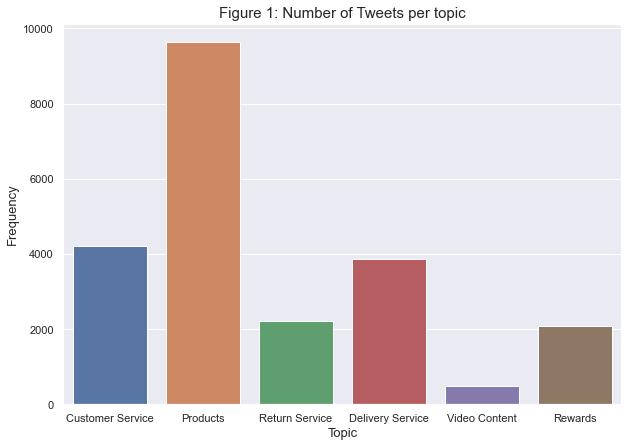

In [61]:
sns.set(rc={'figure.figsize':(10,7)})
ax = sns.countplot(x="main_topic",data=topics_by_tweet);
ax.set_xlabel("Topic",fontsize=13);
ax.set_ylabel("Frequency",fontsize=13);
ax.set_title('Figure 1: Number of Tweets per topic',fontsize=15);
plt.savefig('images/Figure1.png', dpi=200)

**Visualize the distribution of sentiment categories in tweets per topic**

In [62]:
tweets_2= tweets.copy(deep=True)
groups= tweets_2.groupby(['topic','sentiment']).size().reset_index(name='counts')

In [63]:
def get_total(topic):
    s= groups[groups['topic']==topic]
    return sum(list(s.counts))

In [64]:
groups['total']=groups['topic'].apply(lambda x:get_total(x))
groups['percent']= groups['counts']/groups['total']
groups

,topic,sentiment,counts,total,percent
0,Customer Service,NEGATIVE,4014,4198,0.956170
1,Customer Service,NEUTRAL,95,4198,0.022630
2,Customer Service,POSITIVE,89,4198,0.021201
3,Delivery Service,NEGATIVE,3509,3875,0.905548
4,Delivery Service,NEUTRAL,207,3875,0.053419
5,Delivery Service,POSITIVE,159,3875,0.041032
6,Products,NEGATIVE,5954,9640,0.617635
7,Products,NEUTRAL,1286,9640,0.133402
8,Products,POSITIVE,2400,9640,0.248963
9,Return Service,NEGATIVE,2101,2227,0.943422


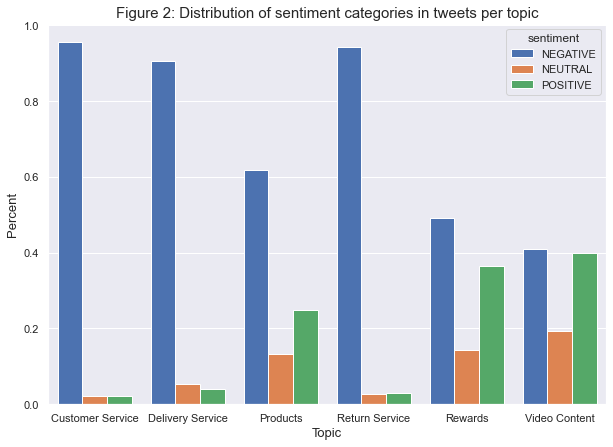

In [65]:
ind = np.arange(len(list(groups['percent'])))
ax.set_yticks(ind)
ax = sns.barplot(x="topic", y="percent", hue="sentiment",data=groups, saturation=1)
ax.set_xlabel("Topic",fontsize=13);
ax.set_ylabel("Percent",fontsize=13);
ax.set_title('Figure 2: Distribution of sentiment categories in tweets per topic',fontsize=15);
plt.savefig('images/Figure2.png', dpi=200)

**Distribution of delivery complaints over time**

Distribution of delivery complaints over the last two years

In [79]:
negative_delivery_tweets= tweets[tweets['topic']== 'Delivery Service']
negative_delivery_tweets = negative_delivery_tweets[negative_delivery_tweets['sentiment']== 'NEGATIVE']

In [80]:
tweets_neg_time= pd.to_datetime(negative_delivery_tweets['date'], format="%Y-%m-%d")
tweets_neg_time= tweets_neg_time.to_frame()
tweets_neg_time.reset_index(inplace=True, drop=True)

In [81]:
tweets_neg_time

,date
0,2021-11-02
1,2021-11-02
2,2021-11-02
3,2021-11-02
4,2021-11-02
...,...
3504,2019-10-30
3505,2019-10-30
3506,2019-10-30
3507,2019-10-30


In [82]:
tweets_neg_time= tweets_neg_time.groupby(['date']).size().reset_index(name='counts')

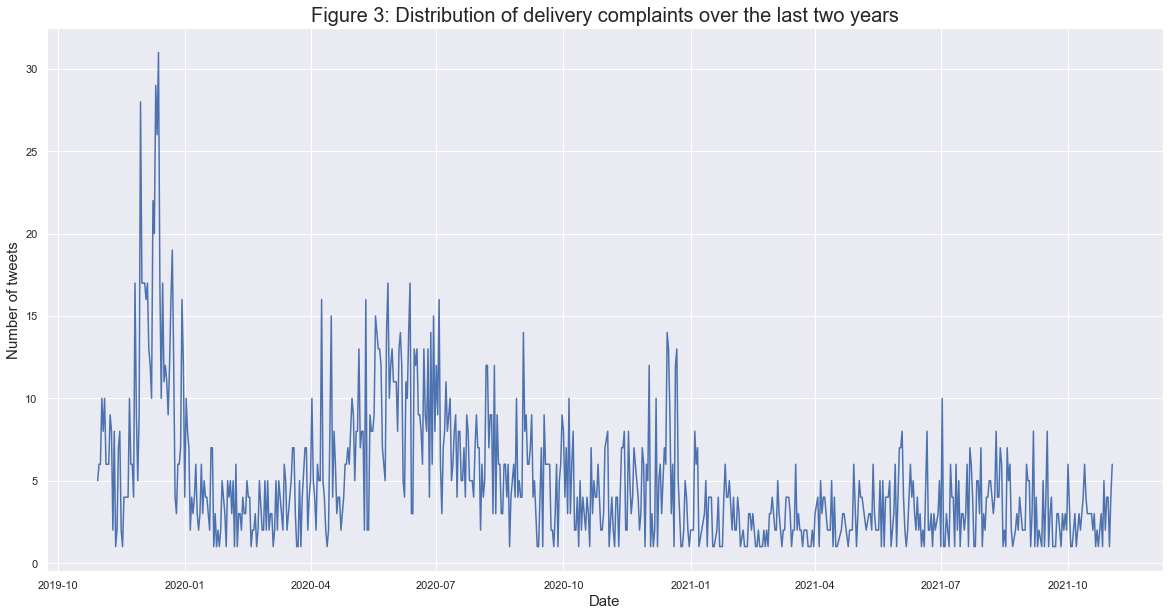

In [83]:
plt.rcParams["figure.figsize"] = (20,10)
plt.title("Figure 3: Distribution of delivery complaints over the last two years", fontsize=20);
x_date1 = tweets_neg_time['date']
y_counts1= tweets_neg_time['counts']
plt.xlabel("Date",fontsize=15);
plt.ylabel("Number of tweets",fontsize=15);
plt.plot(x_date1,y_counts1)
plt.savefig('images/Figure3.png', dpi=200)
plt.show()

In [84]:
tweets_neg_time['year']= tweets_neg_time['date'].dt.year
tweets_neg_time['month']= tweets_neg_time['date'].dt.month
tweets_neg_time['day']= tweets_neg_time['date'].dt.day_name()

In [85]:
tweets_neg_time.head()

,date,counts,year,month,day
0,2019-10-30,5,2019,10,Wednesday
1,2019-10-31,6,2019,10,Thursday
2,2019-11-01,6,2019,11,Friday
3,2019-11-02,10,2019,11,Saturday
4,2019-11-03,8,2019,11,Sunday


Distribution of delivery complaints per month.

In [86]:
tweets_per_month= tweets_neg_time.groupby(['month'])['counts'].sum().reset_index(name='counts')
tweets_per_month.sort_values(by='month', inplace=True)
tweets_per_month['month_name'] = tweets_per_month['month'].apply(lambda x: calendar.month_abbr[x])
tweets_per_month.head(12)

,month,counts,month_name
0,1,201,Jan
1,2,140,Feb
2,3,175,Mar
3,4,217,Apr
4,5,369,May
5,6,393,Jun
6,7,331,Jul
7,8,291,Aug
8,9,236,Sep
9,10,219,Oct


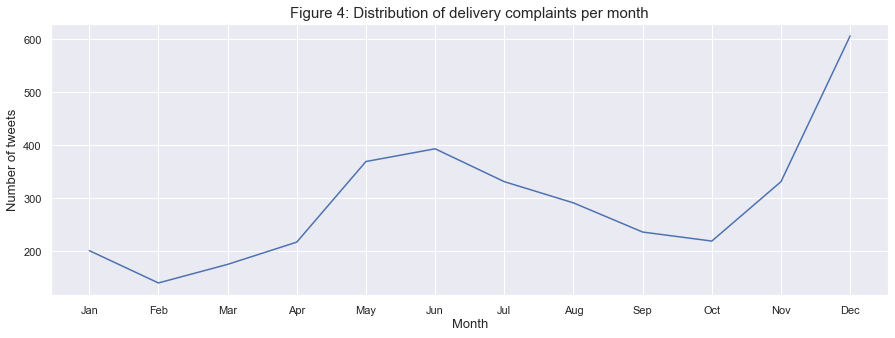

In [87]:
plt.rcParams["figure.figsize"] = (15,5)

plt.title("Figure 4: Distribution of delivery complaints per month", fontsize=15);
x_month = tweets_per_month['month_name']
y_counts2 = tweets_per_month['counts']
plt.xlabel("Month",fontsize=13);
plt.ylabel("Number of tweets",fontsize=13);
plt.plot(x_month,y_counts2)
plt.savefig('images/Figure4.png', dpi=200)
plt.show()

Distribution of delivery complaints per month.

In [88]:
tweets_per_day= tweets_neg_time.groupby(['day'])['counts'].sum().reset_index(name='counts')
days = {'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6}
tweets_per_day['day_num']=tweets_per_day['day'].map(days)
tweets_per_day=tweets_per_day.sort_values(by='day_num')

In [89]:
tweets_per_day

,day,counts,day_num
3,Sunday,327,0
1,Monday,552,1
5,Tuesday,511,2
6,Wednesday,540,3
4,Thursday,553,4
0,Friday,538,5
2,Saturday,488,6


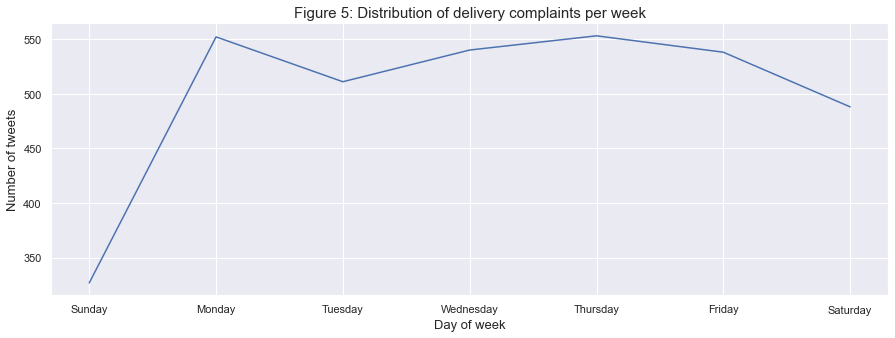

In [90]:
plt.title("Distribution of delivery complaints per day of week")

plt.title("Figure 5: Distribution of delivery complaints per week", fontsize=15);
plt.xlabel("Day of week",fontsize=13);
plt.ylabel("Number of tweets",fontsize=13);

plt.rcParams["figure.figsize"] = (15,5)
x = tweets_per_day['day']
y =  tweets_per_day['counts']

plt.plot(x,y)
plt.savefig('images/Figure5.png', dpi=200)
plt.show()

# Recommendations

After applying topic modeling to organize, understand and summarize large collections of textual tweets content about the products and services provided by ASOS. We can come up with a few recommendations for ASOS staff to improve their services. 

Looking at Figure 2 which shows the distribution of sentiments categories for each topic, we recommend ASOS staff to improve their delivery, return, and customer services since most tweets have negative sentiment on these topics. 

In order to help Asos understand the periods of time in which the number of tweets complaining about delivery is high, we plotted 3 figures. Figure 3 illustrates the number of tweets complaining about delivery over the last two years, we can conclude that at the beginning of each year there is an increase in the number of negative tweets. Thus, we suggest that Asos staff should focus on improving their delivery service during that time.

Figure 4 shows the distribution of tweets complaining about delivery per month. We can see that there was a high number of delivery complaints during December followed by June . Moreover, figure 5 shows the distribution of these tweets per day of the week, we can see that the numbers of these tweets on days of the week are close to each other, only Sunday has lower number of tweets than the rest of the days.